In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,confusion_matrix,precision_recall_curve
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings("ignore")

In [56]:
df=pd.read_csv(r"C:\Users\USER\Downloads\diabetes (3).csv")

In [57]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [61]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
10           139      80             0              0        27.1  1.441                     57   0          1
             148      84             48             237      37.6  1.001                     51   1          1
             161      68             23             132      25.5  0.326                     47   1          1
             162      84             0              0        27.7  0.182                     54   0          1
             168      74             0              0        38.0  0.537                     34   1          1
                                                                                                            ..
0            74       52             10             36       27.8  0.269                     22   0          1
             78       88             29             40       36.9  0.434                     21   0          1
      

In [64]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(0)

<Axes: >

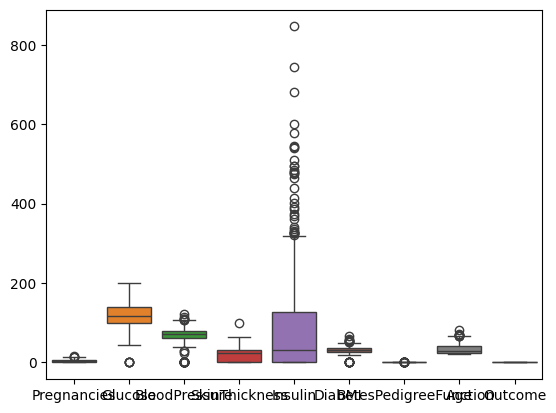

In [67]:
sns.boxplot(df)

In [68]:
def outlier_capping(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[columns]=df[columns].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

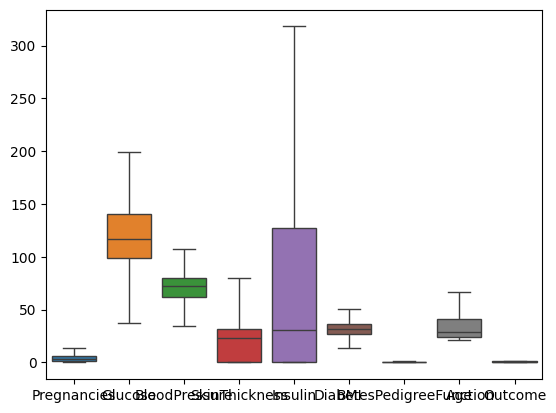

In [69]:
sns.boxplot(df)

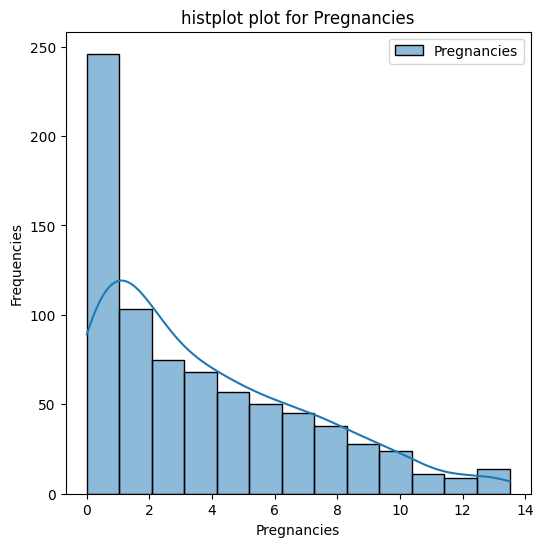

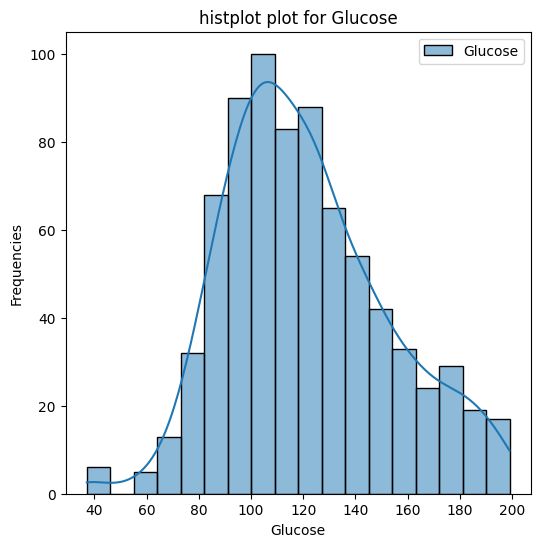

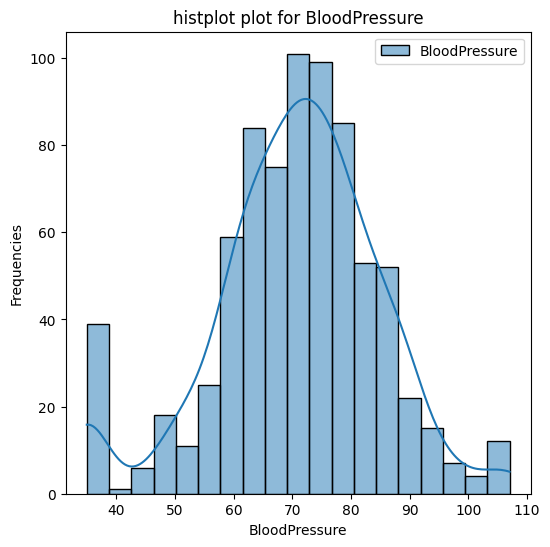

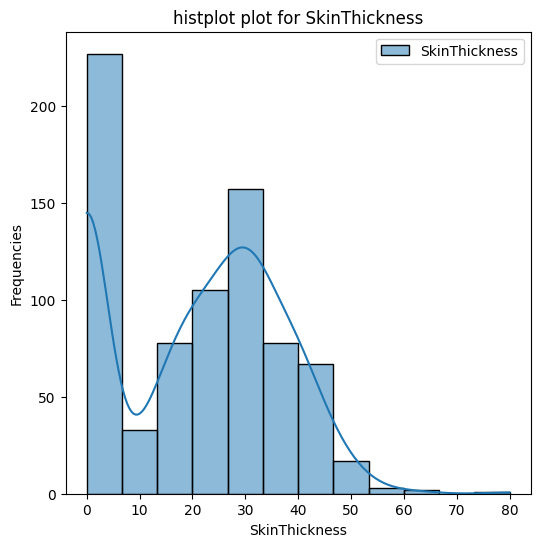

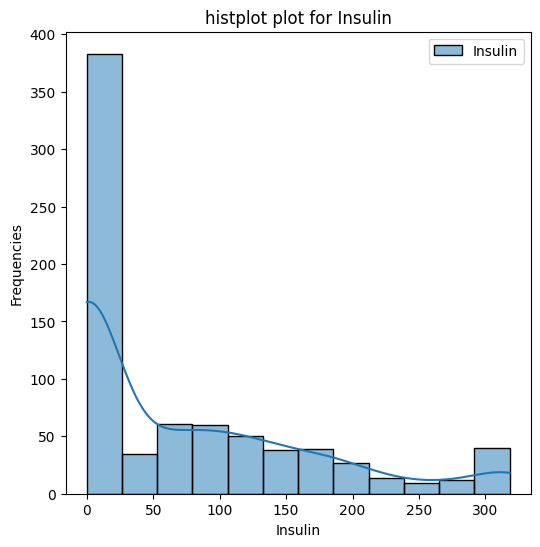

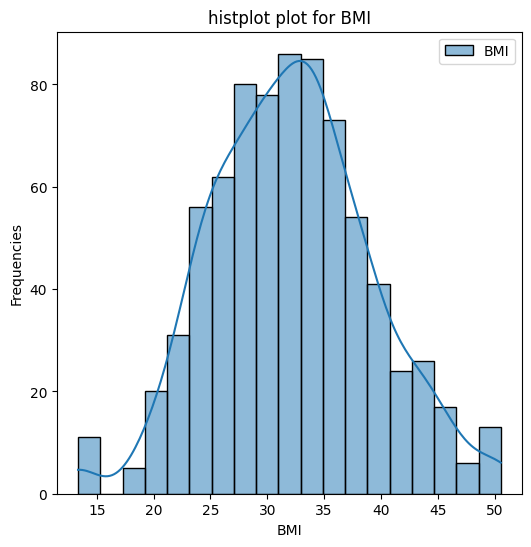

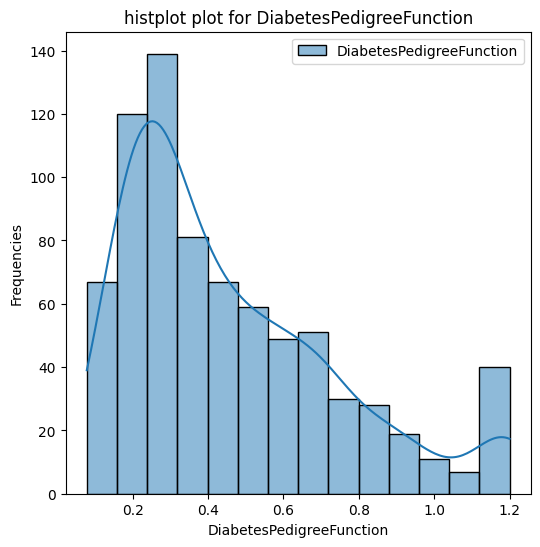

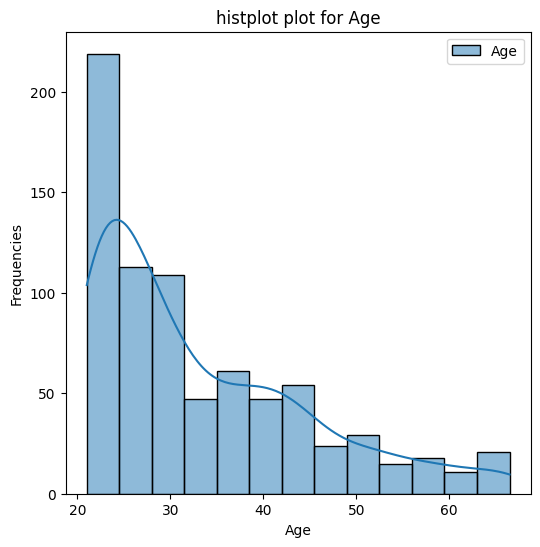

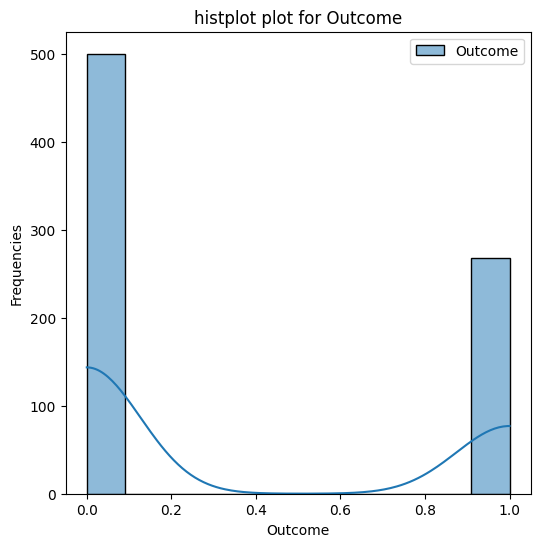

In [70]:
for col in df.columns:
    plt.figure(figsize=(6,6))
    sns.histplot(df[col],label=col,kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"histplot plot for {col}")
    plt.legend()
    plt.show()

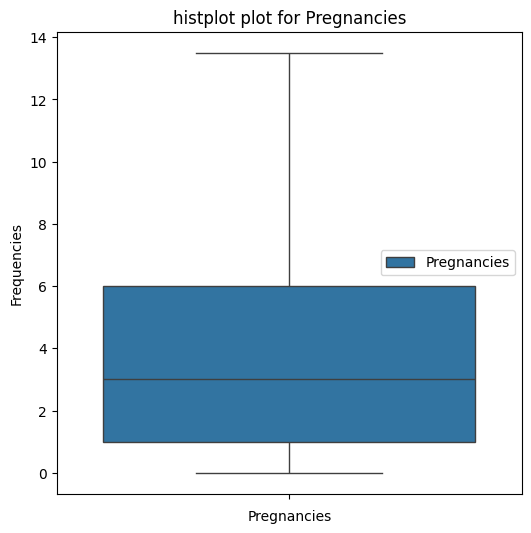

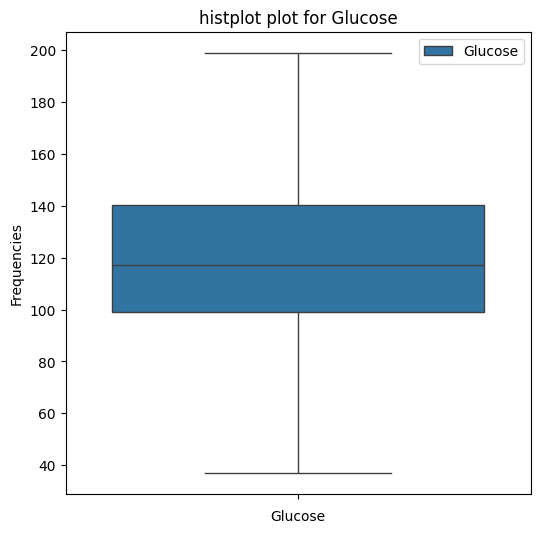

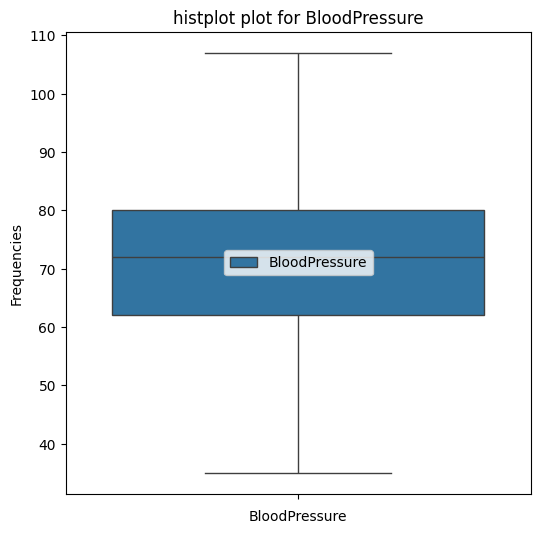

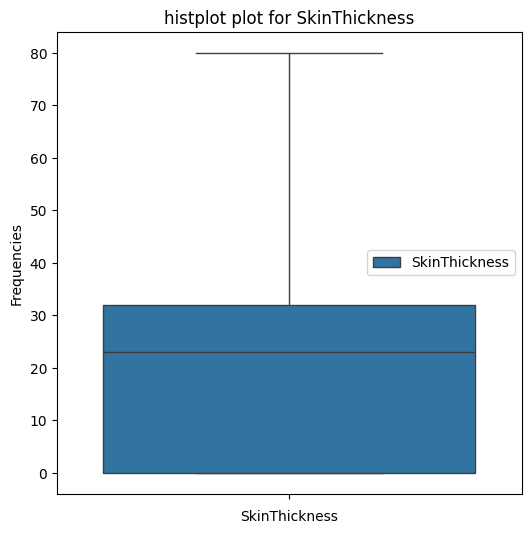

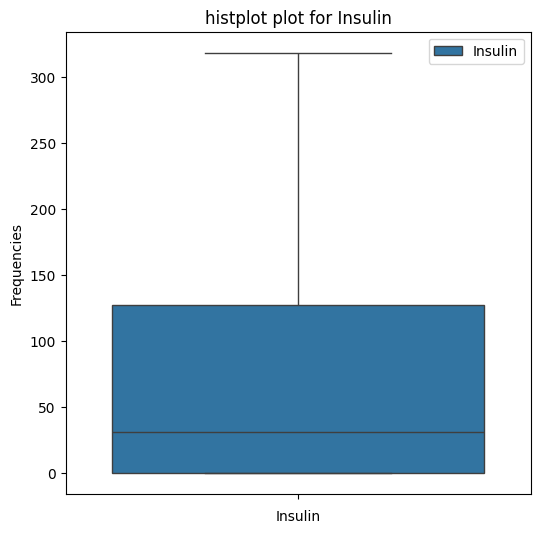

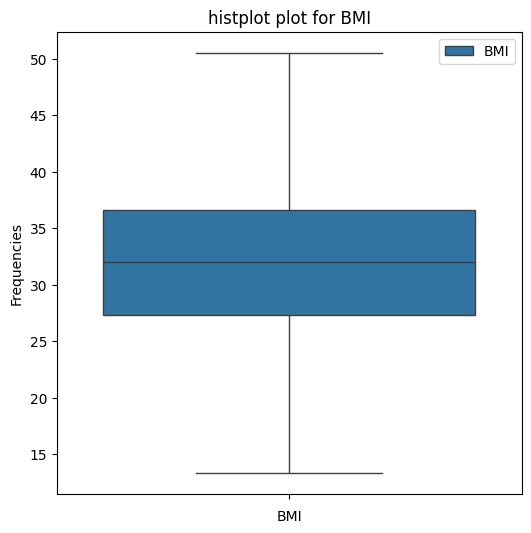

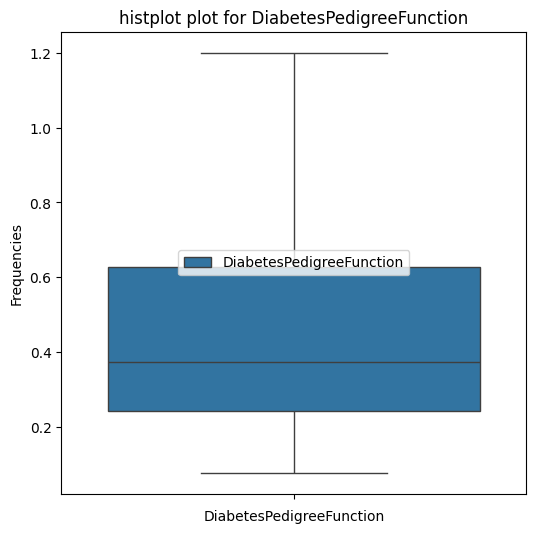

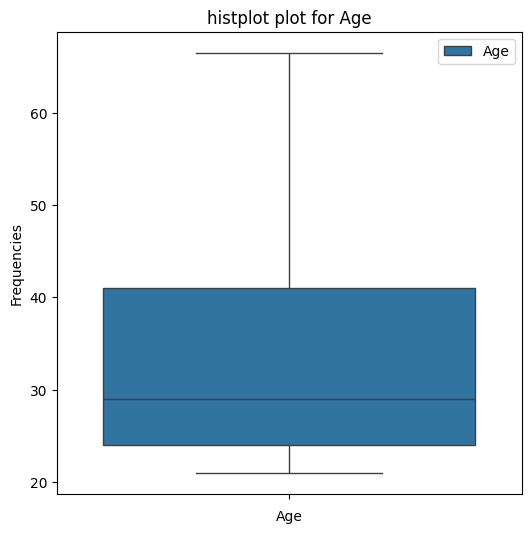

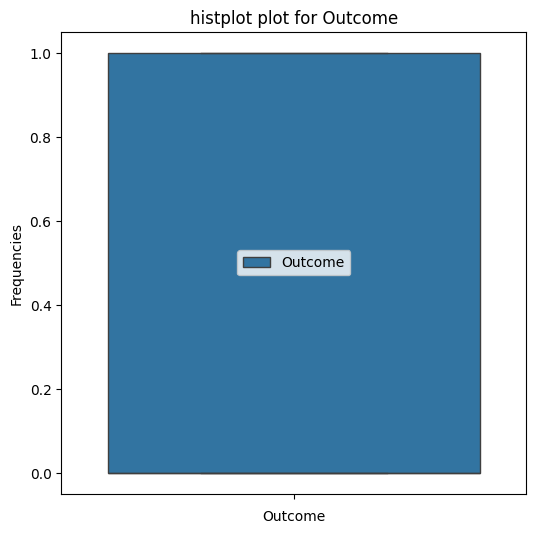

In [71]:
for col in df.columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[col],label=col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"histplot plot for {col}")
    plt.legend()
    plt.show()

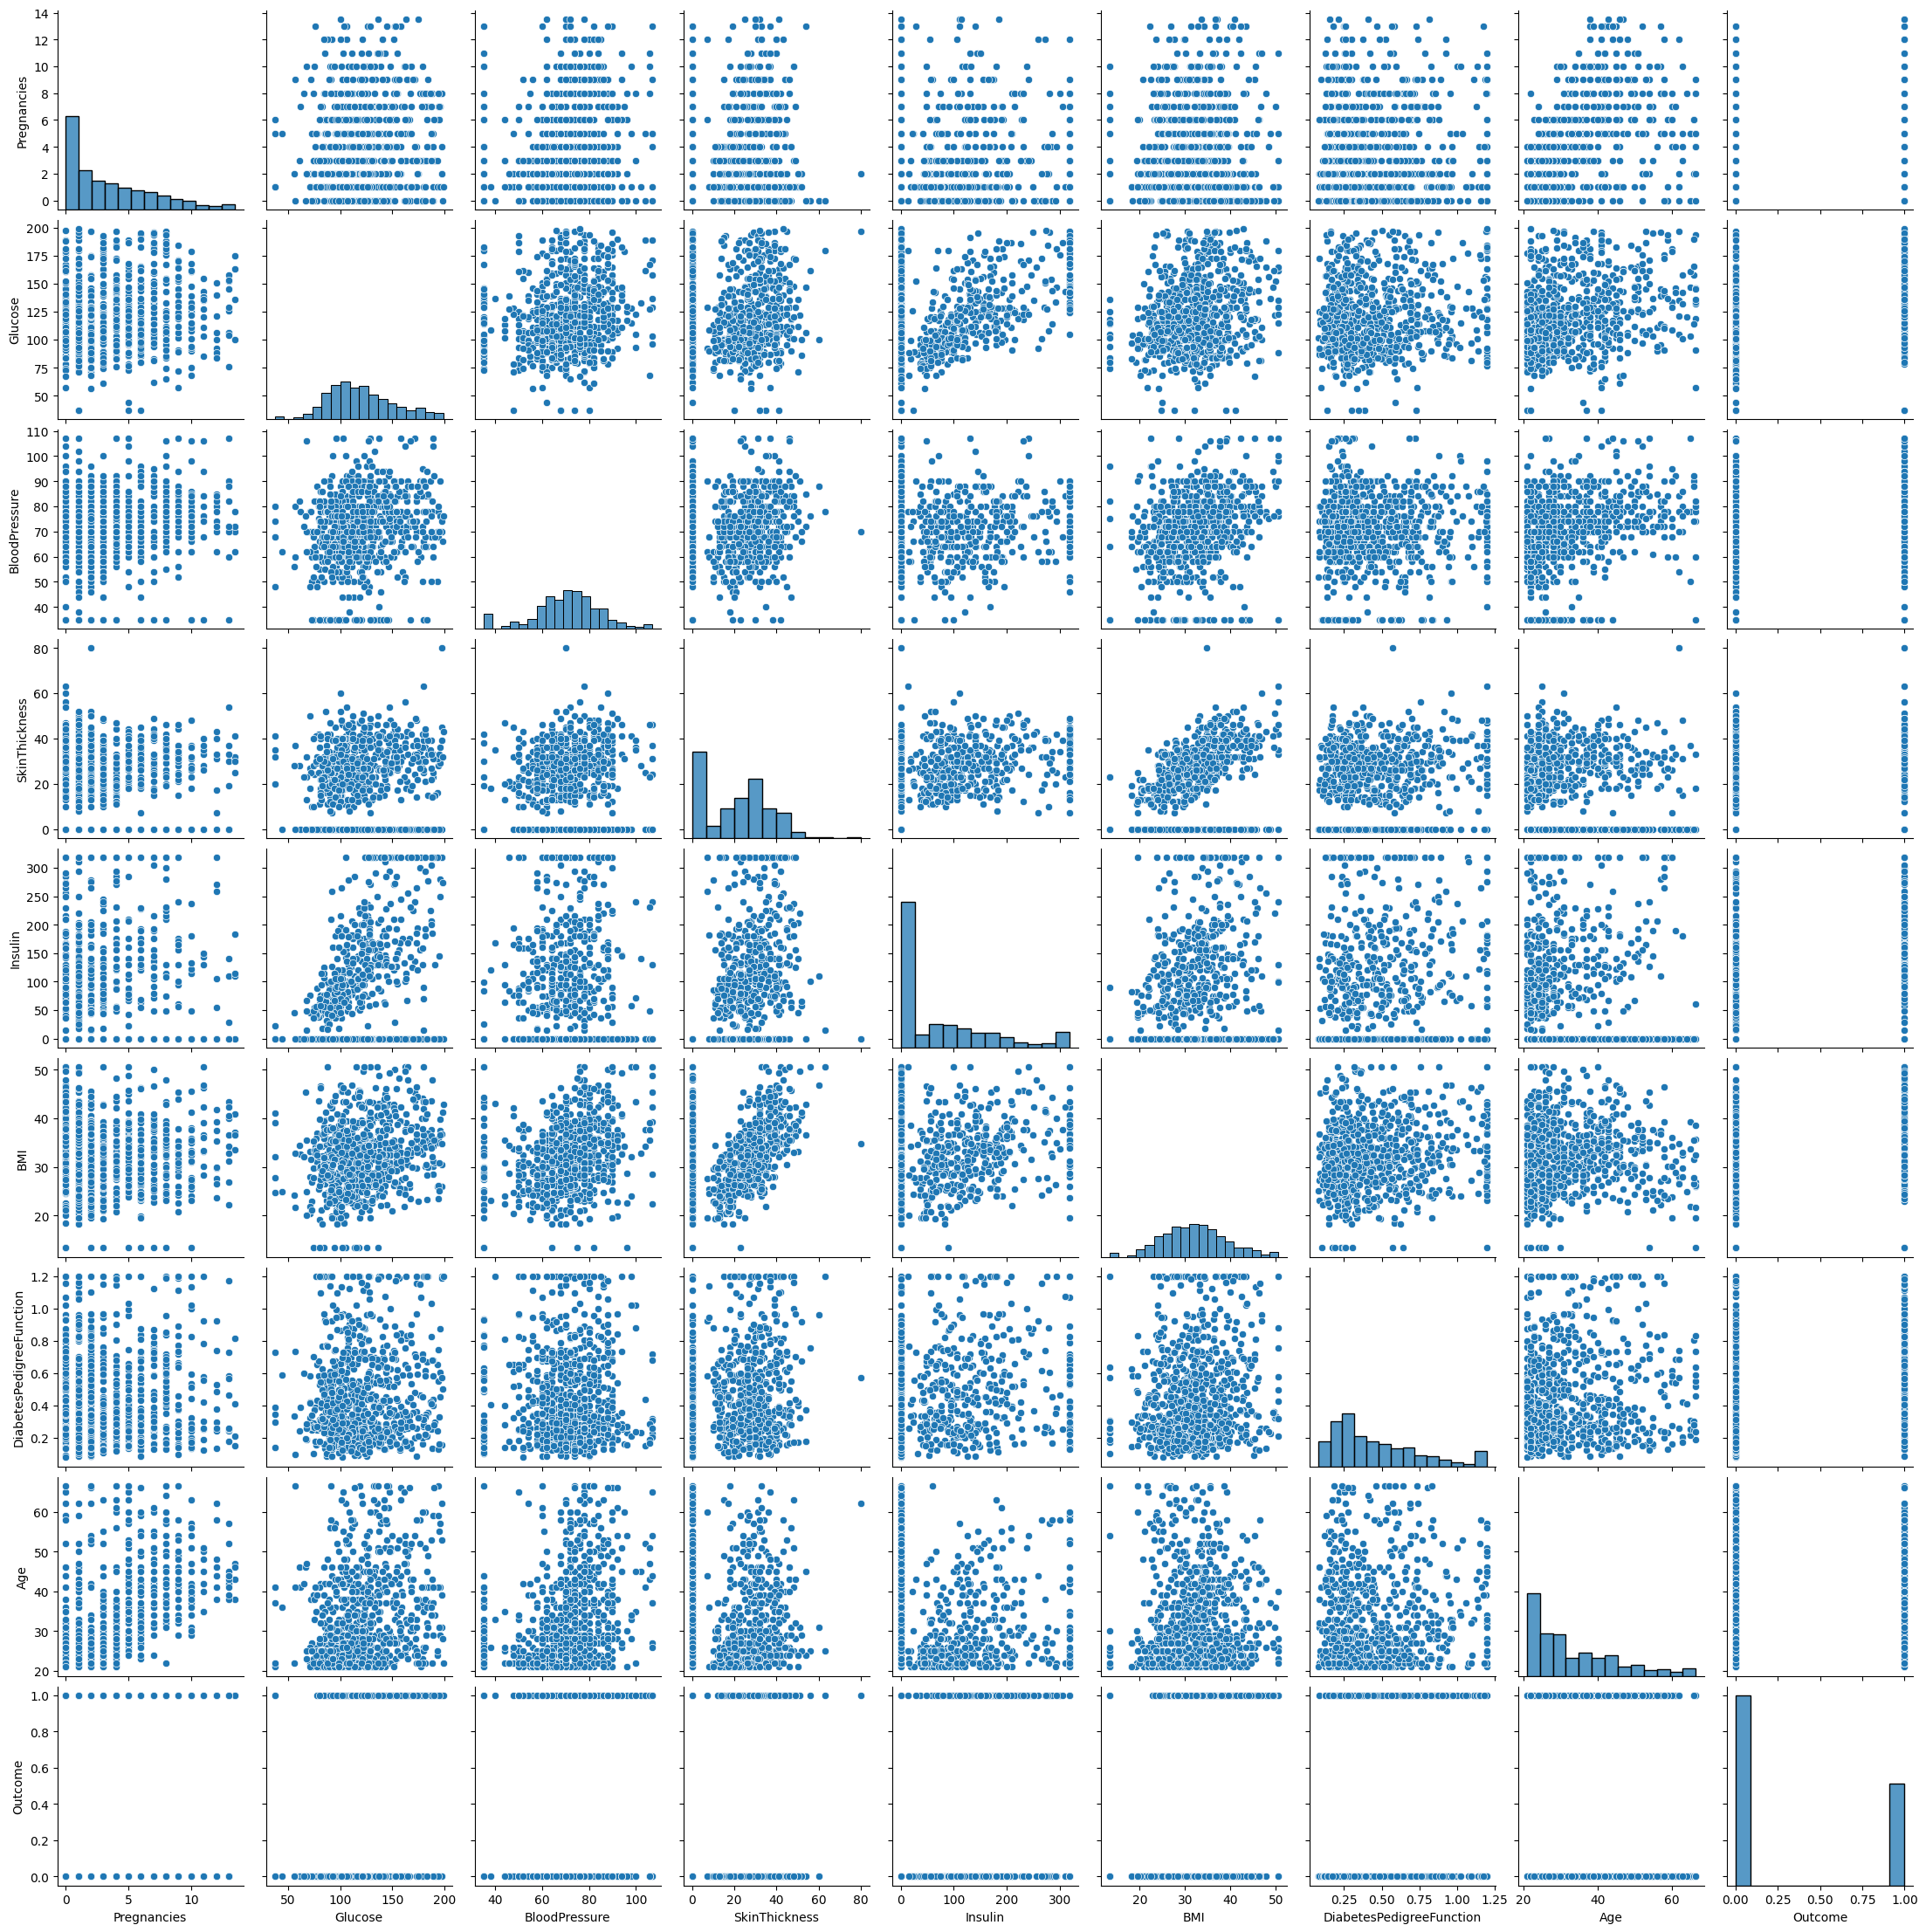

In [72]:
sns.pairplot(df)

In [73]:
corrs=df.corr()

In [74]:
corrs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


<Axes: >

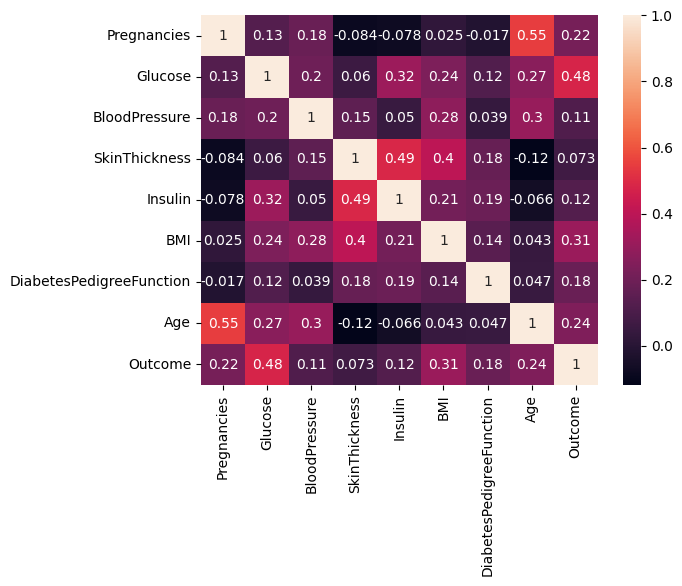

In [75]:
sns.heatmap(corrs,annot=True)

In [76]:
targets=df[["Outcome"]]

In [77]:
targets

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [78]:
feaatures=df.drop(columns="Outcome")

In [79]:
feaatures

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [80]:
f_class=f_classif(feaatures,targets)

<Axes: >

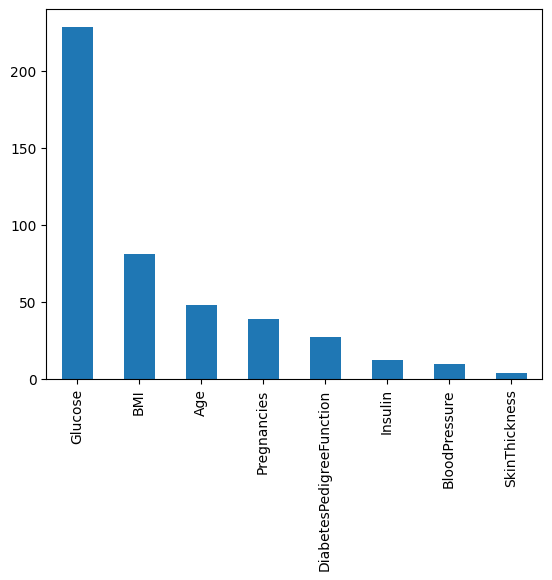

In [81]:
pd.Series(f_class[0],index=feaatures.columns).sort_values(ascending=False).plot(kind="bar")

In [110]:
x_train,x_test,y_train,y_test=train_test_split(featuress,targets,test_size=0.2,random_state=42)

In [111]:
print(feaatures.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(768, 8)
(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [112]:
scalers=StandardScaler()

In [113]:
featuress=pd.DataFrame(scalers.fit_transform(feaatures,targets),columns=feaatures.columns)

In [114]:
featuress

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,-0.549746,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,0.347926,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,-0.848970,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


In [115]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [116]:
logistics=LogisticRegression()

In [117]:
modelss=logistics.fit(x_train,y_train)

In [118]:
y_preds=modelss.predict(x_test)

In [119]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [120]:
accuracy_score(y_test,y_preds)

0.7532467532467533

In [159]:
y_probs = model.predict_proba(x_test)[:, 1]
y_pred_new = (y_probs >= 0.4).astype(int)

In [160]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



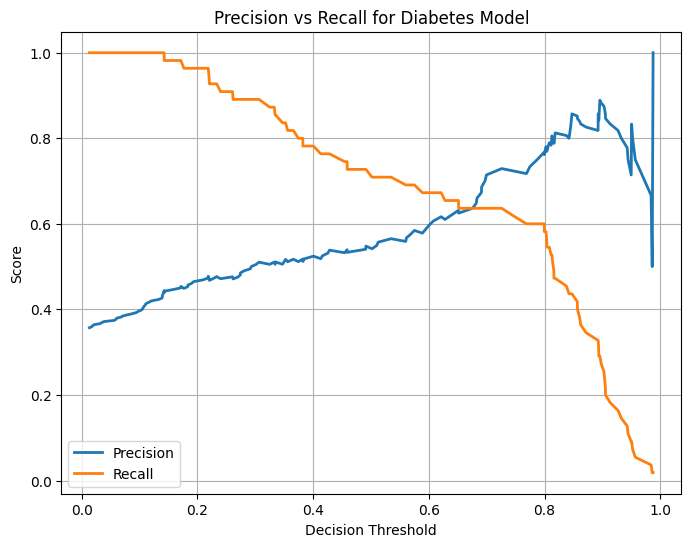

In [164]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], label='Recall', linewidth=2)
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall for Diabetes Model')
plt.legend()
plt.grid(True)
plt.show()


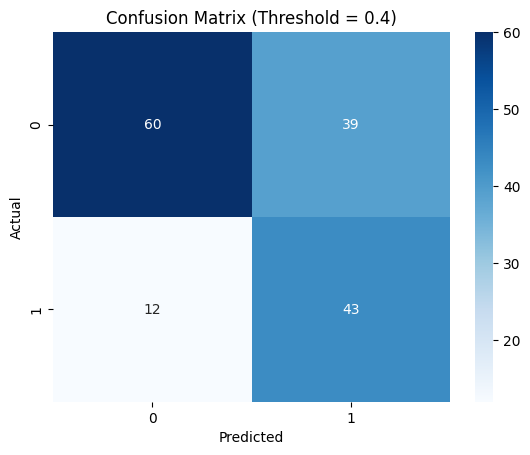

In [165]:
cm = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()


In [166]:
auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", round(auc, 3))

ROC-AUC Score: 0.813


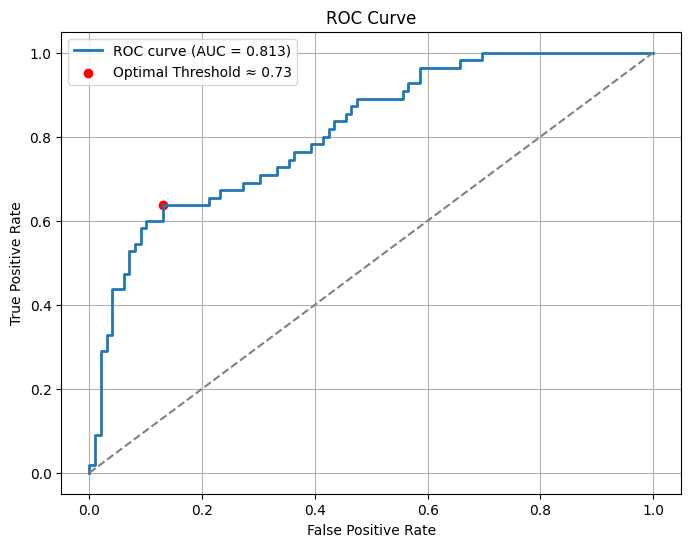

In [167]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='gray')

optimal_idx = np.argmax(tpr - fpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', 
            label=f'Optimal Threshold ≈ {roc_thresholds[optimal_idx]:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients)

                    Feature  Coefficient  Odds_Ratio
0               Pregnancies     0.064236    1.066344
1                   Glucose     0.035982    1.036637
2             BloodPressure    -0.018629    0.981543
3             SkinThickness     0.001864    1.001866
4                   Insulin    -0.002510    0.997493
5                       BMI     0.117823    1.125045
6  DiabetesPedigreeFunction     0.965349    2.625703
7                       Age     0.043905    1.044883



Pregnancies (Coeff=0.064, OR=1.066)
Each additional pregnancy increases odds of diabetes by ~6.6%.
Small but positive effect.

Glucose (Coeff=0.036, OR=1.037)
Higher glucose increases odds of diabetes by ~3.7% per unit.
Glucose is an important predictor.

BloodPressure (Coeff=-0.019, OR=0.982)
Higher blood pressure slightly decreases odds (~1.8% per unit).
Effect is weak.

SkinThickness (Coeff=0.002, OR=1.002)
Minimal positive effect; practically negligible.

Insulin (Coeff=-0.003, OR=0.997)
Very small negative effect; almost no impact.

BMI (Coeff=0.118, OR=1.125)
Higher BMI increases odds by ~12.5% per unit.
Stronger effect than glucose or age.

DiabetesPedigreeFunction (Coeff=0.965, OR=2.626)
Very strong effect: odds more than 2.6× higher per unit increase.
Most significant predictor of diabetes in your model.

Age (Coeff=0.044, OR=1.045)
Older age slightly increases odds (~4.5% per year).
Moderate predictor.

Most significant feature: DiabetesPedigreeFunction (strongest effect on diabetes probability).
Moderate predictors: BMI, Glucose, Age, Pregnancies.
Weak or negligible predictors: BloodPressure, Insulin, SkinThickness.
Direction of influence:
Positive → increases diabetes probability: Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, Age, SkinThickness
Negative → decreases probability: BloodPressure, Insulin

In [174]:
import statsmodels.api as sm

x_train_const = sm.add_constant(x_train)  
logit_model = sm.Logit(y_train, x_train_const).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.460483
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Thu, 09 Oct 2025   Pseudo R-squ.:                  0.2866
Time:                        17:28:41   Log-Likelihood:                -282.74
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 1.150e-44
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.3585      0.893    -10.482      0.000     -11.108

Most significant predictors (p < 0.05):
Glucose, BMI, DiabetesPedigreeFunction, Age, BloodPressure

Not statistically significant (p > 0.05):
Pregnancies, SkinThickness
Insulin is borderline (p=0.075)

Direction of influence:
Positive coefficients → increase diabetes probability: Glucose, BMI, DiabetesPedigreeFunction, Age, Pregnancies, SkinThickness
Negative coefficients → decrease probability: BloodPressure, Insulin

Magnitude & practical effect:
DiabetesPedigreeFunction: strongest effect, odds ~exp(1.0122) ≈ 2.75× per unit increase
BMI & Glucose: moderately strong effect, increasing odds by ~12.5% and ~3.6% per unit increase

Overall Model Interpretation
The model fits well for a logistic regression (Pseudo R² ≈ 0.29).

Significant features: Glucose, BMI, DiabetesPedigreeFunction, Age, BloodPressure

Less significant features: Pregnancies, SkinThickness, Insulin

Practical insight:
A patient with high glucose, high BMI, high DiabetesPedigreeFunction, and older age has much higher probability of diabetes.
Blood pressure slightly reduces risk, and pregnancy or insulin levels have minimal effect in this dataset.

In [176]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [187]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
model = joblib.load('diabetes_model.pkl')
st.title("Diabetes Prediction App")
st.write("Enter the patient details to predict diabetes probability.")
def user_input_features():
    pregnancies = st.number_input("Number of Pregnancies", min_value=0, max_value=20, value=0)
    glucose = st.number_input("Glucose Level", min_value=0, max_value=300, value=120)
    bloodpressure = st.number_input("Blood Pressure", min_value=0, max_value=200, value=70)
    skinthickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
    insulin = st.number_input("Insulin Level", min_value=0, max_value=900, value=79)
    bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
    dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
    age = st.number_input("Age", min_value=0, max_value=120, value=33)
    
    data = {
        'Pregnancies': pregnancies,
        'Glucose': glucose,
        'BloodPressure': bloodpressure,
        'SkinThickness': skinthickness,
        'Insulin': insulin,
        'BMI': bmi,
        'DiabetesPedigreeFunction': dpf,
        'Age': age
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()
prediction_proba = model.predict_proba(input_df)[:, 1]
prediction = model.predict(input_df)

st.subheader("Prediction Probability")
st.write(f"Probability of Diabetes: {prediction_proba[0]*100:.2f}%")

st.subheader("Prediction Result")
if prediction[0] == 1:
    st.write("The model predicts: **Diabetic**")
else:
    st.write("The model predicts: **Non-Diabetic**")

2025-10-09 18:24:31.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-09 18:24:31.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-09 18:24:31.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-09 18:24:31.488 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-09 18:24:31.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-09 18:24:31.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-09 18:24:31.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-09 18:24:31.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [188]:
# JUPYTER DOES NOTE SUPPORTS STREAMLITE SO WE HAVE TO RUN IT IN ONOTHER PYTHON APP LIKE VS CODES PYCHARM THEN IT WILL WORKS

Both precision and recall are metrics used to evaluate the performance of a binary classification model, but they focus on different aspects:
Precision
Definition: The proportion of correctly predicted positive cases out of all cases predicted as positive.

Formula:

Precision
=
True Positives (TP)
True Positives (TP)
+
False Positives (FP)
Precision=
True Positives (TP)+False Positives (FP)
True Positives (TP)
	
Focus: Measures how accurate the positive predictions are.
Example: If your model predicts 10 people as diabetic and 8 are actually diabetic, precision = 8/10 = 0.8 (80%).

Recall (also called Sensitivity or True Positive Rate)
Definition: The proportion of correctly predicted positive cases out of all actual positive cases.
Formula:

Recall
=True Positives (TP)
True Positives (TP)
+
False Negatives (FN)
Recall=
True Positives (TP)+False Negatives (FN)
True Positives (TP)
Focus: Measures how well the model captures all actual positives.
Example: If there are 12 actual diabetic patients and your model correctly identifies 8, recall = 8/12 = 0.667 (66.7%).

Cross-Validation and Its Importance
Definition:
Cross-validation is a technique to assess the performance of a model on unseen data by splitting the dataset into multiple training and testing sets.

Common Method: k-Fold Cross-Validation
Split data into k folds (e.g., 5 or 10).
Train the model on k-1 folds and test on the remaining fold.
Repeat k times with a different test fold each time.
Average the results to get a more reliable performance estimate.

Importance in Binary Classification:
Reduces overfitting – Model is tested on multiple subsets.
Provides more reliable evaluation metrics – Not dependent on a single train-test split.
Helps in model selection and hyperparameter tuning – Ensures the model generalizes well to unseen data.